    id - Unique ID for each home sold
    date - Date of the home sale    
    price - Price of each home sold
    bedrooms - Number of bedrooms
    bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    sqft_living - Square footage of the apartments interior living space
    sqft_lot - Square footage of the land space
    floors - Number of floors
    waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    view - An index from 0 to 4 of how good the view of the property was
    condition - An index from 1 to 5 on the condition of the apartment,
    grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    sqft_above - The square footage of the interior housing space that is above ground level
    sqft_basement - The square footage of the interior housing space that is below ground level
    yr_built - The year the house was initially built
    yr_renovated - The year of the house’s last renovation
    zipcode - What zipcode area the house is in
    lat - Lattitude
    long - Longitude
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [395]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pypyodbc as odbc
import squarify
import pyodbc
import requests
import statsmodels.api as sm
from io import StringIO
from sklearn.linear_model import LinearRegression
print('Completed import lib')

Completed import lib


In [396]:
# Với file raw từ github cần thao tác như sau
url = 'https://raw.githubusercontent.com/DK-Hieu/House_price_prediction/main/ver_4_kc_house/kc_house_data.csv'
req = requests.get(url)
data = StringIO(req.text)
p_house = pd.read_csv(data)

columns_drop = ['date','zipcode','lat','long']
p_house.drop(columns=columns_drop,inplace=True)

In [397]:
p_house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [398]:
p_house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.0,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.0,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,290.0,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.0,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [399]:
p_house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406


<AxesSubplot:>

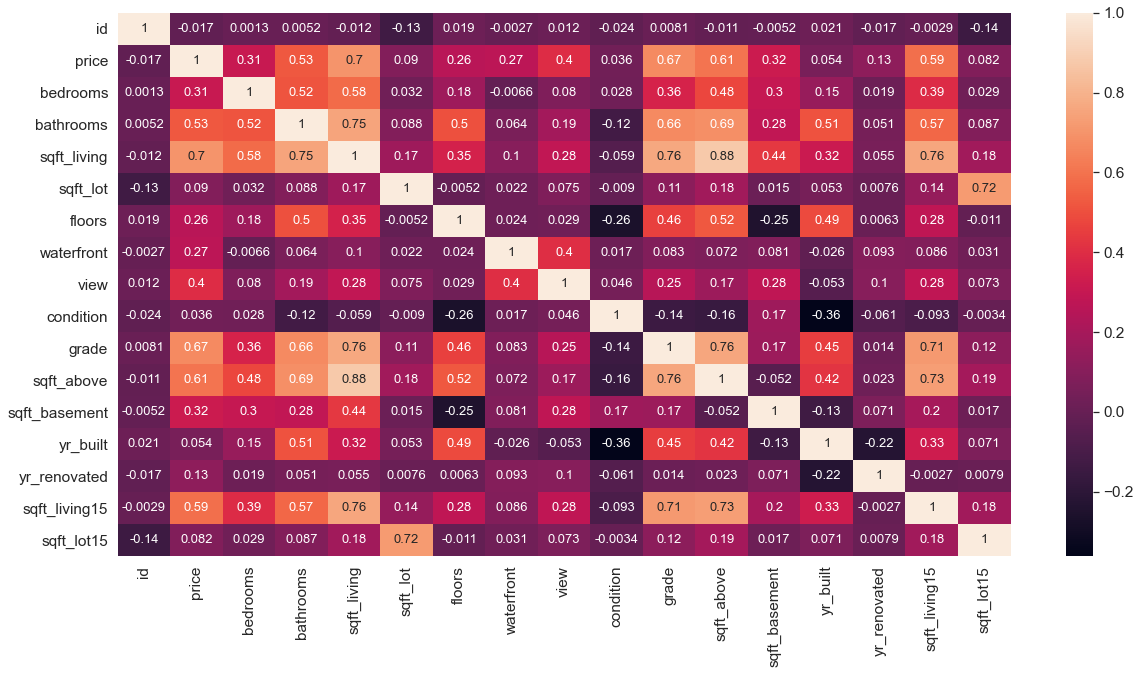

In [400]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(font_scale=1.4)
sns.heatmap(p_house.corr(), annot=True, annot_kws={"size": 13},)

### Price

D:\anacoda\envs\vscode\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales')

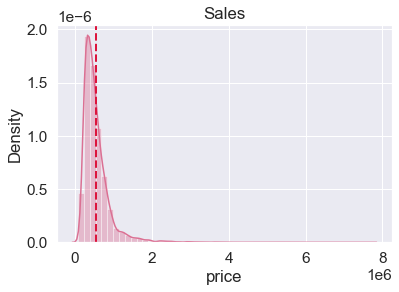

In [401]:
sns.distplot(p_house['price'],color='palevioletred')
plt.axvline(x=p_house['price'].mean(), color='crimson', linestyle='--', linewidth=2)
plt.xlim()
plt.title('Sales')


D:\anacoda\envs\vscode\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


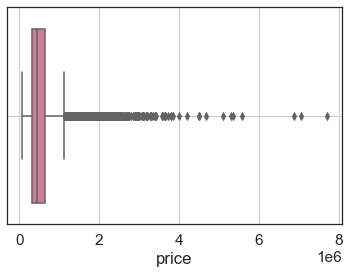

In [402]:
sns.set_style(style='white')
sns.boxplot(p_house['price'], color= 'palevioletred', orient='h')
plt.grid(True)
#plt.xlim(-3,6)
plt.xlabel('price')
plt.show()

In [403]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

p_house = remove_outliers(p_house, 'price')

Outliers of price are removed



In [404]:
p_house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20467.0,4.603223e+09,2.877364e+09,1000102.0,2.131701e+09,3.905082e+09,7.338101e+09,9.900000e+09
price,20467.0,4.769846e+05,2.083713e+05,75000.0,3.150000e+05,4.375000e+05,6.000000e+05,1.127500e+06
bedrooms,20467.0,3.329750e+00,9.128847e-01,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,20467.0,2.051632e+00,7.119060e-01,0.0,1.500000e+00,2.000000e+00,2.500000e+00,7.500000e+00
sqft_living,20467.0,1.975558e+03,7.748335e+02,290.0,1.400000e+03,1.860000e+03,2.431000e+03,7.480000e+03
sqft_lot,20467.0,1.461041e+04,4.010956e+04,520.0,5.000000e+03,7.500000e+03,1.031900e+04,1.651359e+06
floors,20467.0,1.476035e+00,5.370334e-01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,20467.0,2.980407e-03,5.451302e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,20467.0,1.726682e-01,6.409505e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,20467.0,3.406361e+00,6.472280e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


D:\anacoda\envs\vscode\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anacoda\envs\vscode\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


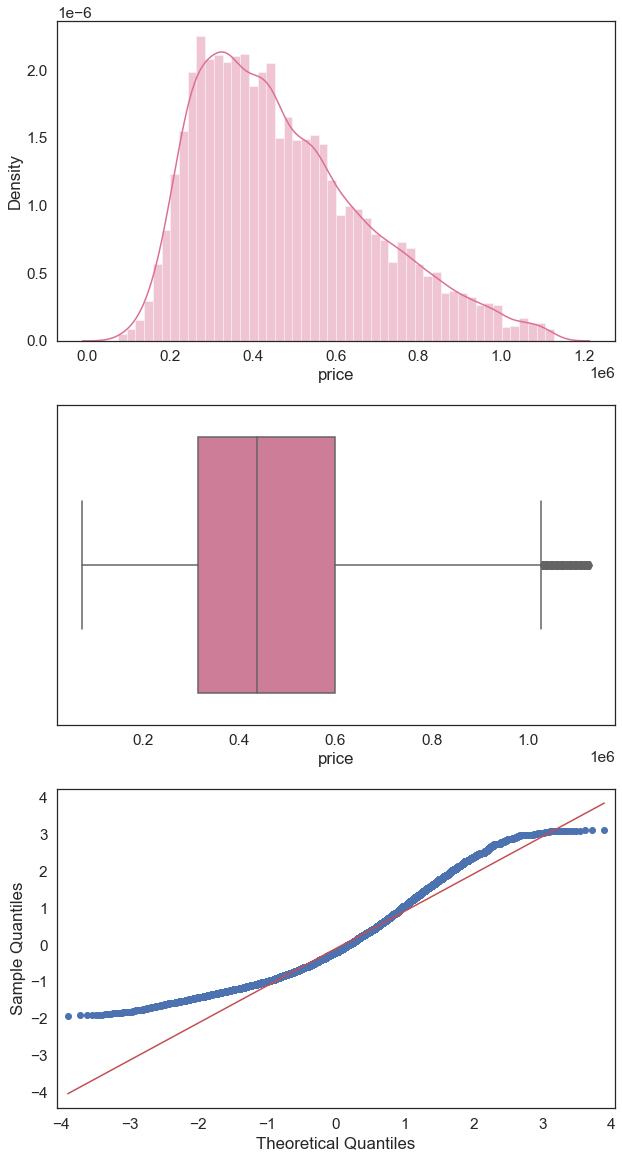

In [405]:
import matplotlib.gridspec as gridspec

#gridkw = dict(height_ratios=[])
#fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, gridspec_kw=gridkw)
fig, ((ax1), (ax2),(ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(10,20))


#ax1 = fig.add_subplot(grid[0, :])
sns.distplot(p_house['price'],color='palevioletred', ax=ax1)

#ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(p_house['price'], color= 'palevioletred', orient='h',ax=ax2)

#ax3 = fig.add_subplot(grid[2, :])
sm.qqplot(p_house['price'], fit=True,line='q',ax=ax3)

plt.show()

### bedrooms

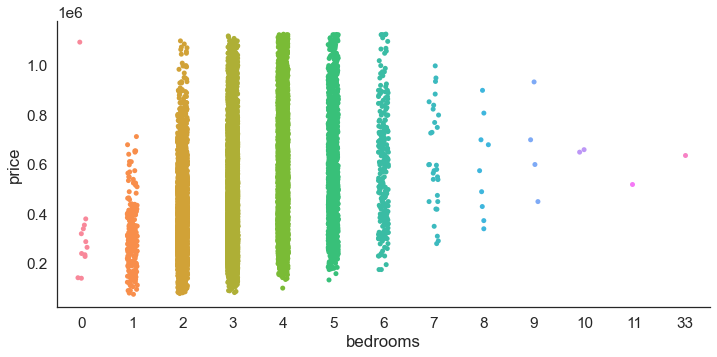

In [406]:
sns.catplot(x='bedrooms', y='price', data=p_house, height=5, aspect=2)

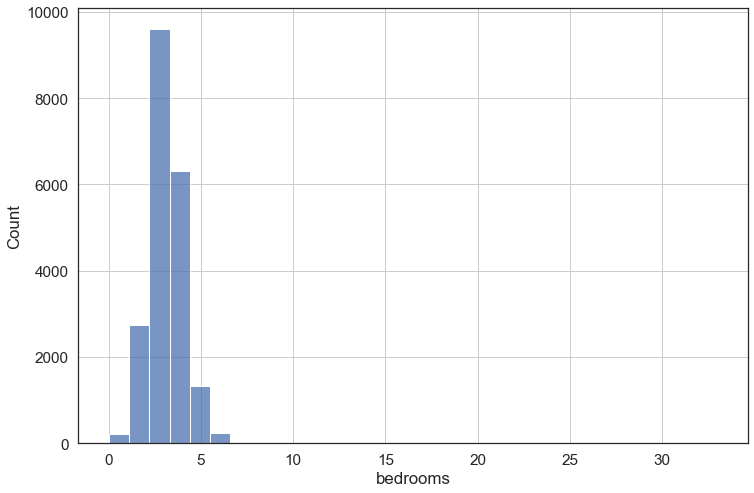

In [407]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(p_house.bedrooms, bins=30)

plt.grid(True)

Outline là các điểm > 8, loại bỏ những điểm outline

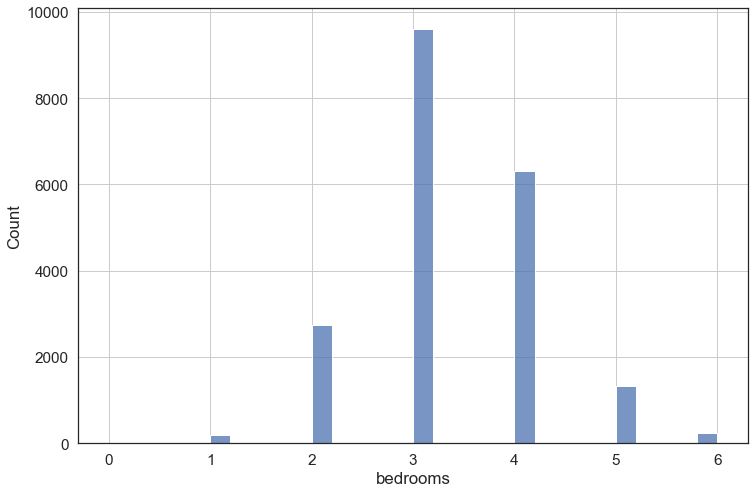

In [408]:
p_house = p_house[p_house['bedrooms'] < 7]

fig = plt.figure(figsize=(12, 8))
sns.histplot(p_house.bedrooms, bins=30)

plt.grid(True)

In [409]:
p_house.shape

(20420, 17)

### bathroom

D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

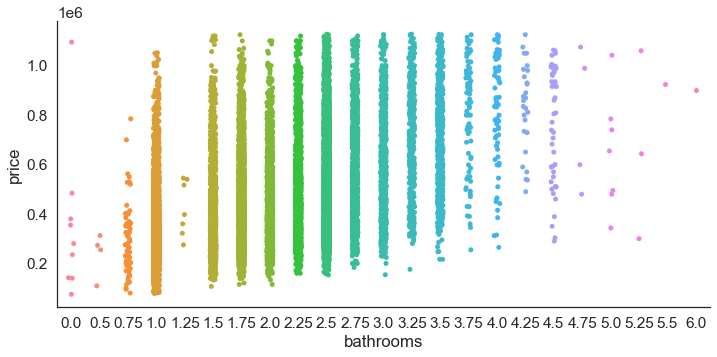

In [410]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='bathrooms', y='price', data=p_house, height=5, aspect=2, ax=ax)

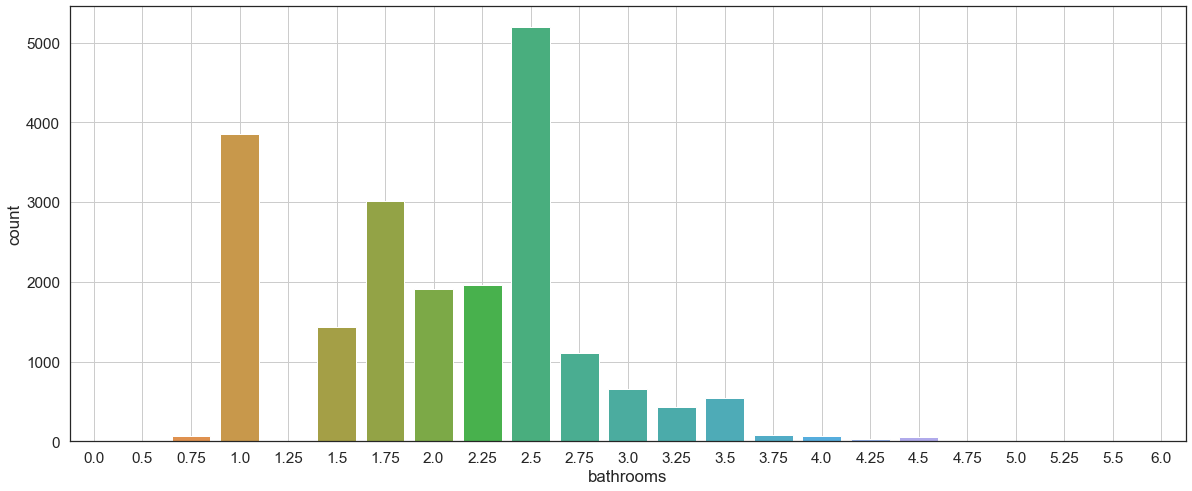

In [411]:
fig = plt.figure(figsize=(20, 8))
sns.countplot(x=p_house['bathrooms'])

plt.grid()

Loại bỏ outline với 0.5 < giá trị < 4.75 và loại bỏ giá trị 1.25

In [412]:
p_house[p_house.bathrooms == 1.25]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
972,1455100116,397500.0,3,1.25,1510,13737,1.0,0,3,4,6,810,700,1961,0,2560,10202
1678,2658000335,275000.0,3,1.25,1230,4500,1.5,0,0,4,7,1230,0,1913,0,1310,5000
3732,793200100,360000.0,3,1.25,2350,6200,1.0,0,0,4,7,1320,1030,1966,0,2140,9543
16840,955000430,540000.0,2,1.25,1230,1569,2.0,0,0,3,9,1050,180,2009,0,1100,1230
20701,7589700055,545000.0,2,1.25,1240,2150,2.0,0,0,3,8,1240,0,2014,0,1340,5289
21065,1498301048,321950.0,2,1.25,860,1277,2.0,0,0,3,7,860,0,2007,0,1280,1265
21552,688000017,516500.0,1,1.25,1100,638,3.0,0,0,3,9,1100,0,2014,0,1110,1933


In [413]:
p_house = p_house.loc[(p_house['bathrooms']>0.75)&(p_house['bathrooms']<4.75)]
p_house = p_house.drop(p_house[p_house.bathrooms == 1.25].index)


D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

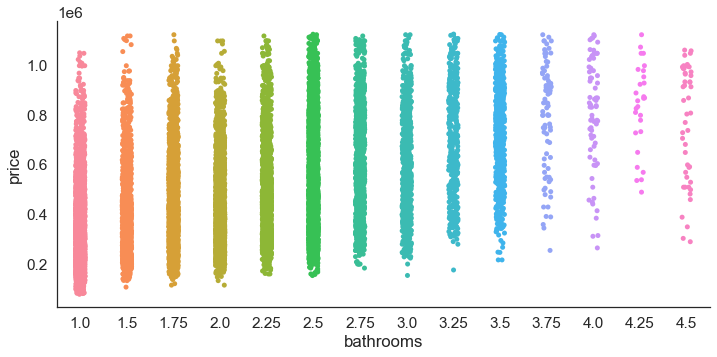

In [414]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='bathrooms', y='price', data=p_house, height=5, aspect=2, ax=ax)

In [415]:
p_house.shape

(20312, 17)

### Square footage

In [416]:
sqft_cols = p_house.columns[p_house.columns.str.contains('sqft')]
sqft_cols

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

D:\anacoda\envs\vscode\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anacoda\envs\vscode\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anacoda\envs\vscode\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

<AxesSubplot:xlabel='sqft_lot15', ylabel='Density'>

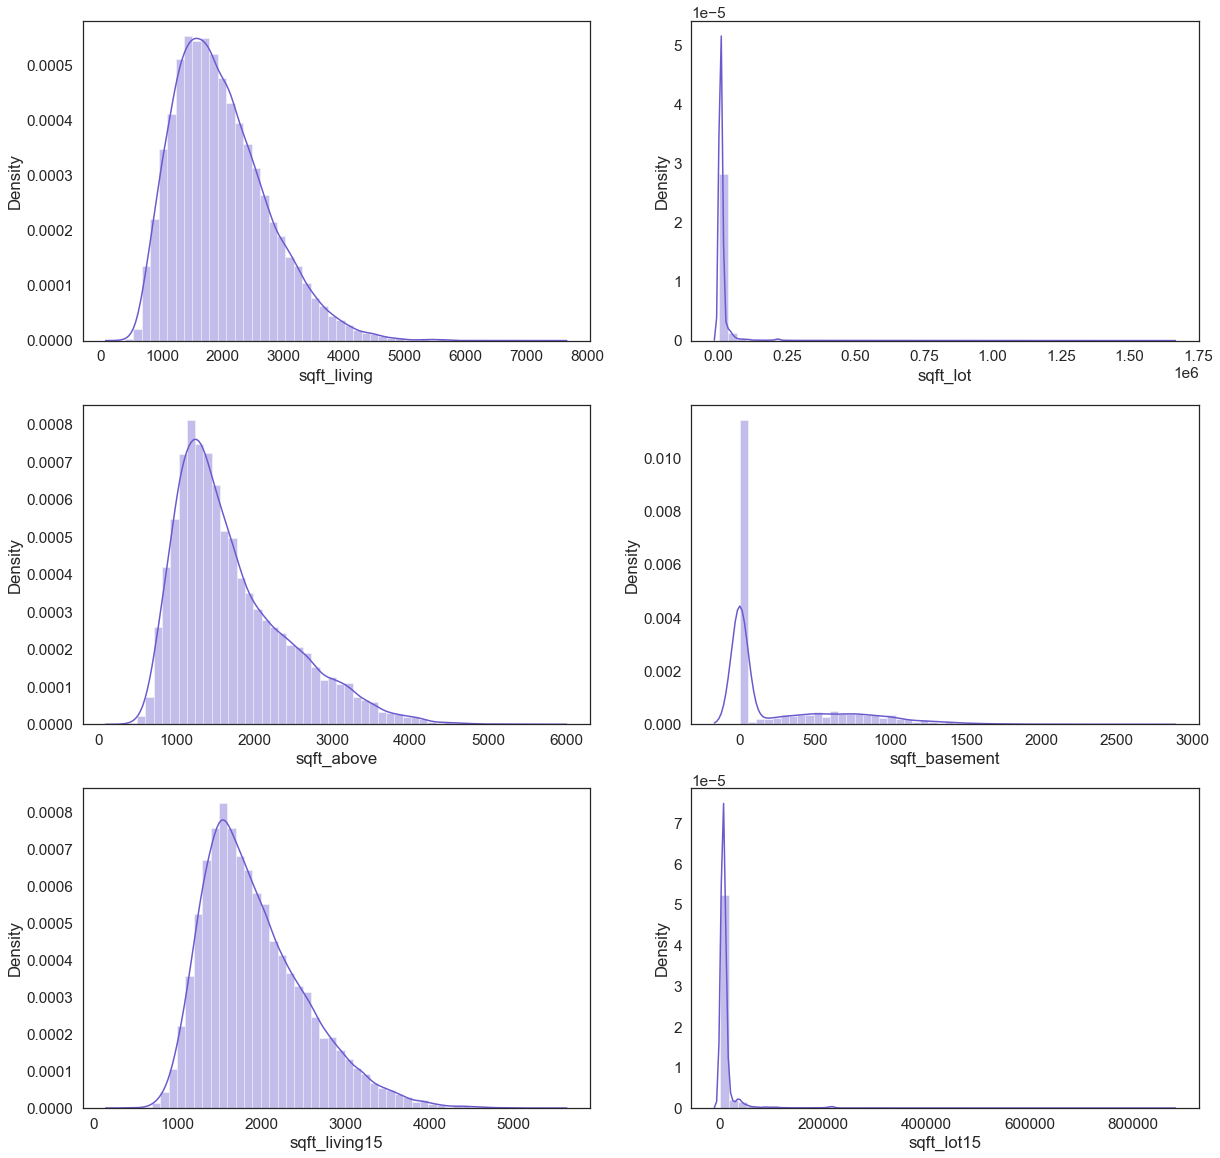

In [417]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

sns.distplot(p_house['sqft_living'],color='slateblue', ax=ax1)
sns.distplot(p_house['sqft_lot'],color='slateblue', ax=ax2)
sns.distplot(p_house['sqft_above'],color='slateblue', ax=ax3)
sns.distplot(p_house['sqft_basement'],color='slateblue', ax=ax4)
sns.distplot(p_house['sqft_living15'],color='slateblue', ax=ax5)
sns.distplot(p_house['sqft_lot15'],color='slateblue', ax=ax6)


Floors

D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

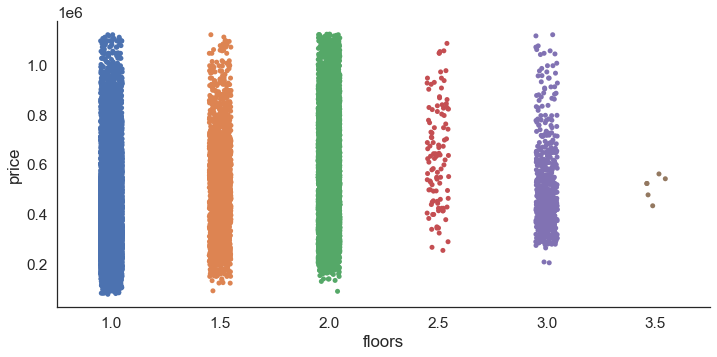

In [418]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='floors', y='price', data=p_house, height=5, aspect=2, ax=ax)

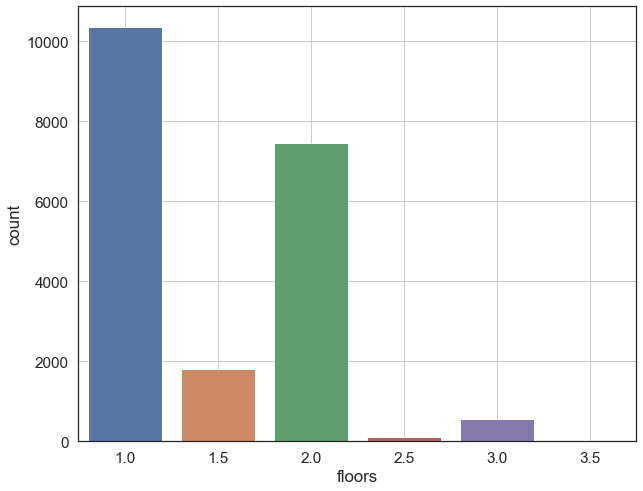

In [419]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(x=p_house.floors)

plt.grid()

Lại bỏ các giá trị >= 3.5

In [420]:
p_house = p_house[p_house.floors < 3.5]
p_house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200


D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 3600x2880 with 0 Axes>

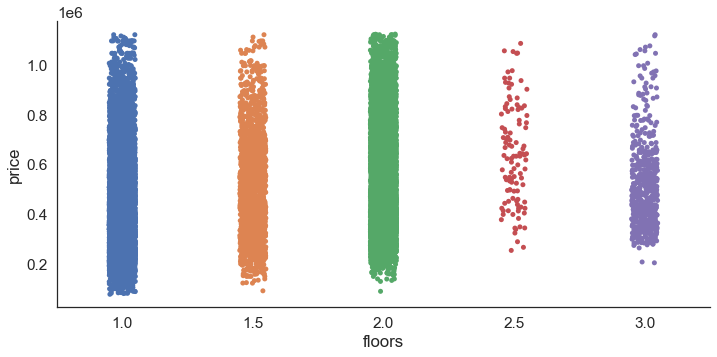

In [421]:
ax = plt.figure(figsize=(50, 40))
sns.catplot(x='floors', y='price', data=p_house, height=5, aspect=2, ax=ax)

### Waterfront

D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

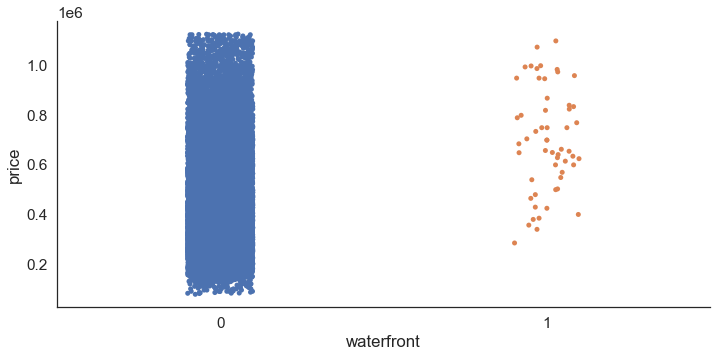

In [422]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='waterfront', y='price', data=p_house, height=5, aspect=2, ax=ax)

### View

D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

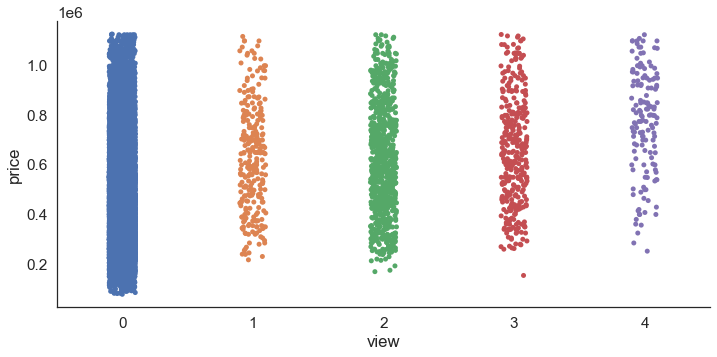

In [423]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='view', y='price', data=p_house, height=5, aspect=2, ax=ax)

### Condition

In [425]:
p_house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200


D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

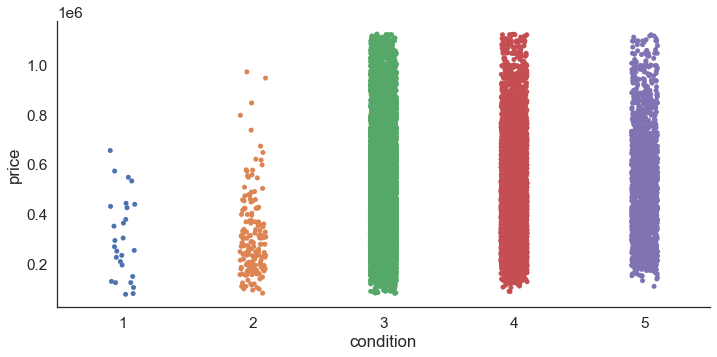

In [426]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='condition', y='price', data=p_house, height=5, aspect=2, ax=ax)

### Grade

D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

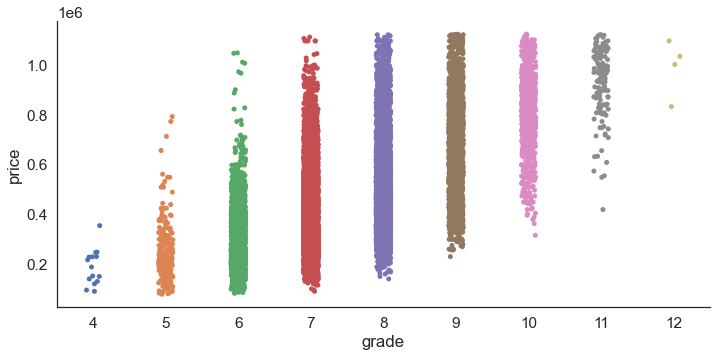

In [427]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='grade', y='price', data=p_house, height=5, aspect=2, ax=ax)

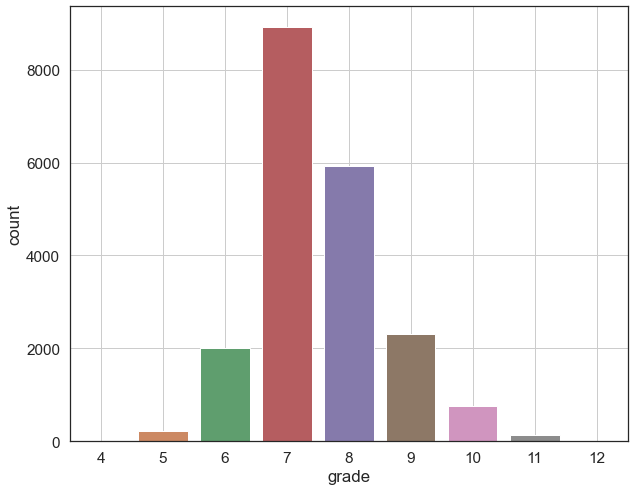

In [428]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(x=p_house.grade)

plt.grid()

Loại bỏ outline 4 < grade < 12

In [429]:
p_house = p_house[(p_house['grade'] > 4) & (p_house['grade'] < 12)]
p_house


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200


D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

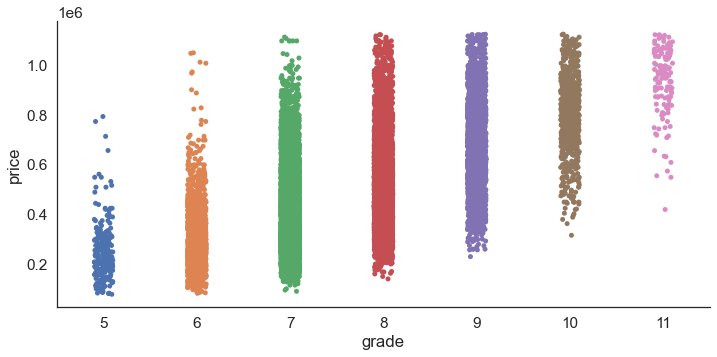

In [430]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='grade', y='price', data=p_house, height=5, aspect=2, ax=ax)

### yr_built

D:\anacoda\envs\vscode\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

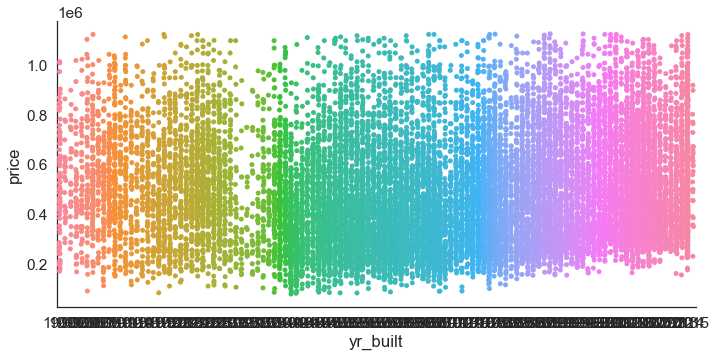

In [432]:
ax = plt.figure(figsize=(10, 20))
sns.catplot(x='yr_built', y='price', data=p_house, height=5, aspect=2, ax=ax)

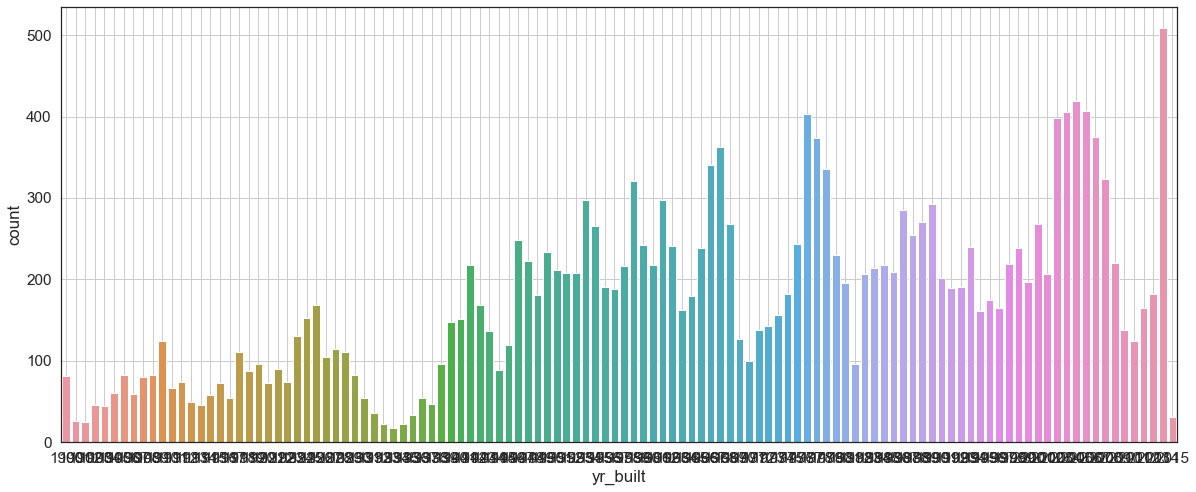

In [433]:
fig = plt.figure(figsize=(20, 8))
sns.countplot(x=p_house['yr_built'])

plt.grid()

In [435]:
print(p_house.yr_built.value_counts())

2014    509
2005    419
2006    407
2004    405
1977    403
       ... 
1901     26
1902     24
1933     22
1935     22
1934     17
Name: yr_built, Length: 116, dtype: int64
